<a href="https://colab.research.google.com/github/attrigirish/python-ml/blob/master/Linear_Regression_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cusom Linear Regression Classifier


**Correlation**

![alt text](https://pythonprogramming.net/static/images/machine-learning/obvious-positive-correlation.png)

**Best Fit Line**

![alt text](https://pythonprogramming.net/static/images/machine-learning/positive-correlation.png)

**More Example**

![alt text](https://pythonprogramming.net/static/images/machine-learning/weak-negative.png)

![alt text](https://pythonprogramming.net/static/images/machine-learning/no-correlation.png)



# Best Fit Line

**Finding the straight line**

 y = mx + b, where m is the slope and b is the y-intercept.
 
 **Calculating the m slope and b (y-intercept)**
 
 ![alt text](https://pythonprogramming.net/static/images/machine-learning/best-fit-slope.png)
 
 and
 
 ![alt text](https://pythonprogramming.net/static/images/machine-learning/best-fit-y-intercept.png)

In [0]:
from statistics import mean
import numpy as np

In [0]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

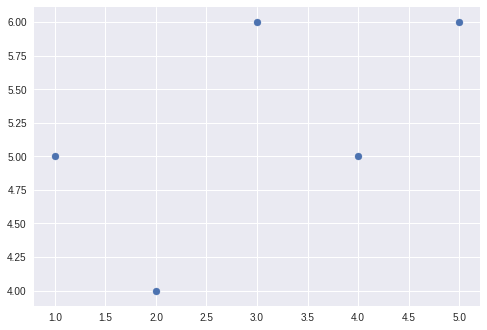

In [6]:
from matplotlib import pyplot as plt

plt.scatter(xs,ys)

In [0]:
#Calculating the m slope

def Slope(xs,ys):
  m = (( (mean(xs)*mean(ys)) - mean(xs*ys)) / ( (mean(xs)**2) - mean(xs**2)))
  return m
  

In [0]:
#Calculating the b (y-intercept)

def Intercept(xs,ys):
  m=Slope(xs,ys)
  b = mean(ys) - m*mean(xs)
  return b

In [13]:
#Regression Line

m=Slope(xs,ys)
b=Intercept(xs,ys)
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)
    
print(regression_line)

[4.600000000000002, 4.900000000000001, 5.2, 5.499999999999999, 5.799999999999998]


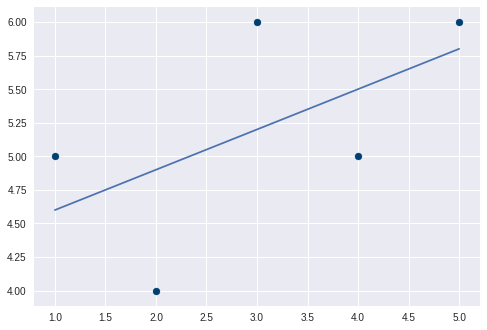

In [14]:
plt.scatter(xs,ys,color='b')
plt.plot(xs, regression_line, color='r')
plt.show()


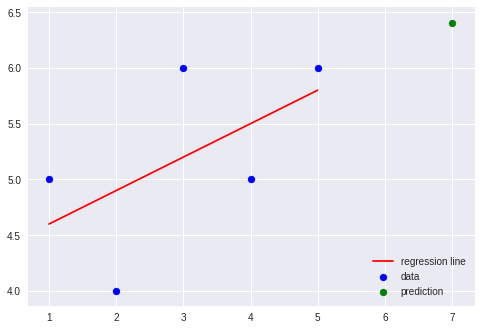

In [18]:
#Predicting the Output

predict_x = [7,6,9]
predict_y = []
for i in range(len(predict_x)):  
  value=(m*predict_x[i])+b
  predict_y.append(value)

plt.scatter(xs,ys,color='b',label='data')
plt.plot(xs, regression_line, color='r', label='regression line')
plt.scatter(predict_x,predict_y, color='g', label='prediction')
plt.legend(loc=4)
plt.show()

**R Squared and Coefficient of Determination**

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

*  0% indicates that the model explains none of the variability of the response data around its mean.
*  100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data.


**Limitations of R squared**

R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!




**Squared Errors**

The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this.

Equation of squared errors is:

![alt text](https://pythonprogramming.net/static/images/machine-learning/coefficient-of-determination-r-squared.png)

The equation is essentially 1 minus the division of the squared error of the regression line and the squared error of the mean y line. The mean y line is quite literally the mean of all of the y values from the dataset. 

In [0]:
#Calculating Squared Errors

def SquaredError(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [0]:
#Calculating Coefficient of Determination

def CoefficientOfDetermination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = SquaredError(ys_orig, ys_line)
    squared_error_y_mean = SquaredError(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [21]:
#Calculating R Squared

r_squared = CoefficientOfDetermination(ys,regression_line)
print(r_squared)

0.3214285714285714


In [0]:
#Creating Sample Data for Application
import random

def CreateDataset(n,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(n):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

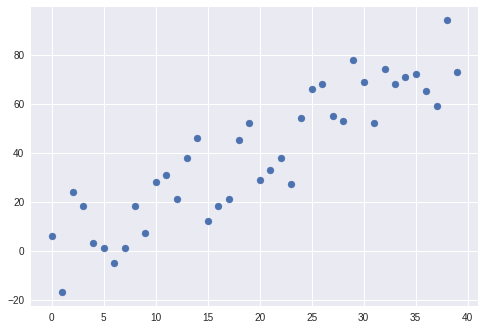

In [26]:
#Creating Data Set and Visualizing Data

xs, ys = CreateDataset(40,20,2,correlation='pos')

plt.scatter(xs,ys)

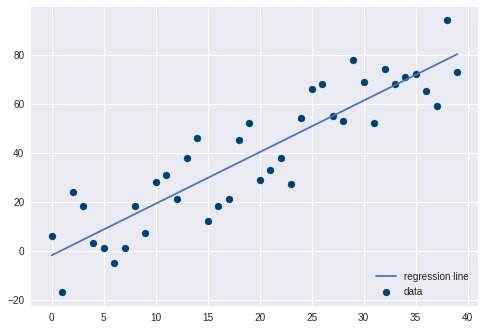

In [27]:
#Reapplying the Classifier

m=Slope(xs,ys)
b=Intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

In [28]:
#Predicting the accuracy

r_squared = CoefficientOfDetermination(ys,regression_line)

print(r_squared)

0.8076091463867868
